<a href="https://colab.research.google.com/github/yyujnn/Deep_Learning/blob/main/ex09_%EB%A1%9C%EC%9D%B4%ED%84%B0%EB%89%B4%EC%8A%A4_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters # 로이터 뉴스 데이터
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
(X_train, y_train),(X_test, y_test)= reuters.load_data()
# 46개 이상의 주제로 11,228개(뉴스 기사)
# 전처리(수치화)된 데이터

# 단어 중심으로 토큰화

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(len(X_test))

8982
2246


In [ ]:
# 첫 번째 기사
X_train[0]
# 빈도수를 기준으로 수치화 된 상태
# 작은 숫자 (3, 5, 10등 ) -> 뉴스에 자주 등장함!
# 높은 숫자 (27595, 28842등 ) -> 뉴스 기사에 자주 등장하지 않음!

In [ ]:
reuters.get_word_index()

In [ ]:
(X_train, y_train),(X_test, y_test)= reuters.load_data(num_words =10)
# 빈도 높은 10개 단어 제외, 전부 2로 바꿈

In [ ]:
X_train[1000]

In [ ]:
(X_train, y_train),(X_test, y_test)= reuters.load_data(num_words =1000)
X_train[1000]

In [ ]:
print (np.unique(y_train)) # 46개 카테고리로 이루어져 있는 뉴스 기사
print(len(np.unique(y_train)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
46


### RNN 학습
- RNN을 이용해 뉴스 기사를 보고 46가지 카테고리 중 어디에 속하는지 예측하는 모델을 만들어보자!

### 학습을 위해 데이터 모양 맞추기
(sample, time step, feuture )

In [ ]:
len(X_train[0])

87

In [ ]:
len(X_train[100])

409

In [ ]:
len(X_train[626])

93

In [ ]:
# 시퀀스 길이 맞추기
X_train_len = [len(doc) for doc in X_train]
# X_train의 뉴스 기사 길이를 전부 측정해서 리스트에 담고 X_train_len 변수에 할당

In [ ]:
print('최소 : ', min(X_train_len))
print('최대 : ', max(X_train_len)) # 기사의 최대 단어 개수
print('평균 : ', np.mean(X_train_len))
print('중앙값 : ', np.median(X_train_len))
# 너무 적거나, 많지 않은 110 ~ 120 정도의 단어를 RNN에 입력 받도록 해보자!

최소 :  13
최대 :  2376
평균 :  145.5398574927633
중앙값 :  95.0


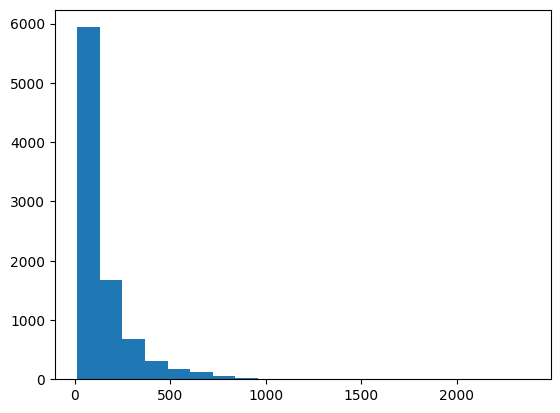

In [ ]:
plt.hist(X_train_len, bins = 20)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import sequence

In [ ]:
# 데이터 전처리
# 각 기사의 단어 수가 다르기 때문에 단어의 갯수(숫자)를 맞춰주자!
X_train_pad = sequence.pad_sequences(X_train, maxlen = 120)
X_test_pad = sequence.pad_sequences(X_test, maxlen = 120)

In [ ]:
X_train_pad.shape , X_test_pad.shape

((8982, 120), (2246, 120))

In [ ]:
X_train_pad[0]
# feature 한 번 순환할 때 들어가는 숫자 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 8, 2, 2, 2, 5, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 7, 2, 5, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 7, 2, 4, 2, 8, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 2, 2, 7, 2,
       9, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 6, 2, 2, 2, 2], dtype=int32)

In [ ]:
len(X_train_pad[0])

120

In [ ]:
len(X_train_pad[1000])

120

In [ ]:
X_train_pad_reshape = X_train_pad.reshape(8982,120,1)
X_test_pad_reshape = X_test_pad.reshape(2246, 120, 1)
# sample, time step, feuture

#### 모델 설계 및 학습

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = (120, 1)))
model.add(SimpleRNN(128))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))

In [ ]:
# 모델 학습/평가 방법
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
y_train # 정답 그 자체임, 확률 정보로 바꾸어야함 -> 원핫 인코딩 loss = 'spares_categorical_crossentropy'

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
history = model.fit(X_train_pad_reshape, y_train, validation_split = 0.3 , epochs = 30 )

Epoch 1/30
197/197 [==============================] - 10s 42ms/step - loss: 2.4961 - accuracy: 0.3477 - val_loss: 2.5002 - val_accuracy: 0.2215
Epoch 2/30
197/197 [==============================] - 9s 46ms/step - loss: 2.4113 - accuracy: 0.3611 - val_loss: 2.3984 - val_accuracy: 0.3532
Epoch 3/30
197/197 [==============================] - 8s 40ms/step - loss: 2.4137 - accuracy: 0.3598 - val_loss: 2.3771 - val_accuracy: 0.3651
Epoch 4/30
197/197 [==============================] - 8s 40ms/step - loss: 2.3803 - accuracy: 0.3663 - val_loss: 2.4098 - val_accuracy: 0.3532
Epoch 5/30
197/197 [==============================] - 9s 46ms/step - loss: 2.4176 - accuracy: 0.3577 - val_loss: 2.3834 - val_accuracy: 0.3651
Epoch 6/30
197/197 [==============================] - 10s 53ms/step - loss: 2.4023 - accuracy: 0.3609 - val_loss: 2.3799 - val_accuracy: 0.3651
Epoch 7/30
197/197 [==============================] - 8s 40ms/step - loss: 2.3949 - accuracy: 0.3646 - val_loss: 2.3413 - val_accuracy: 0.36

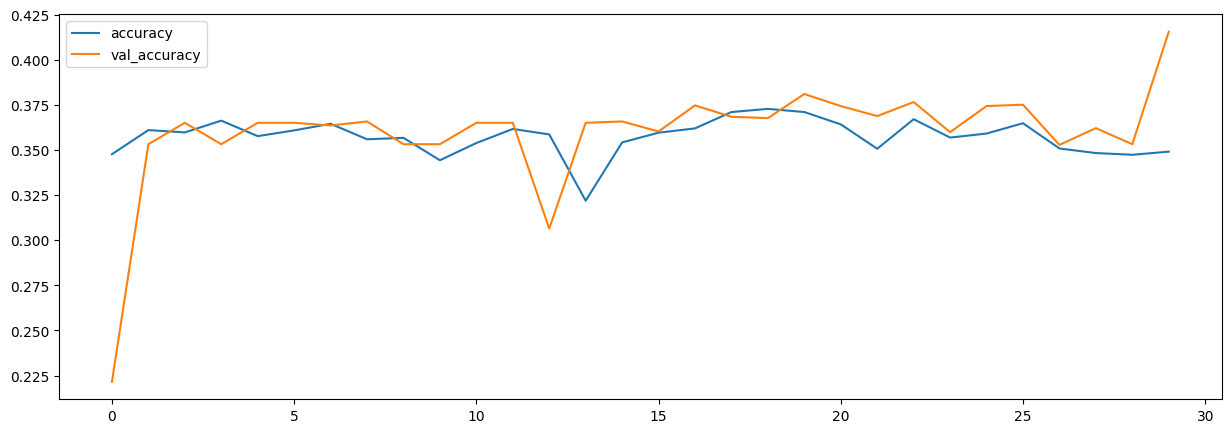

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

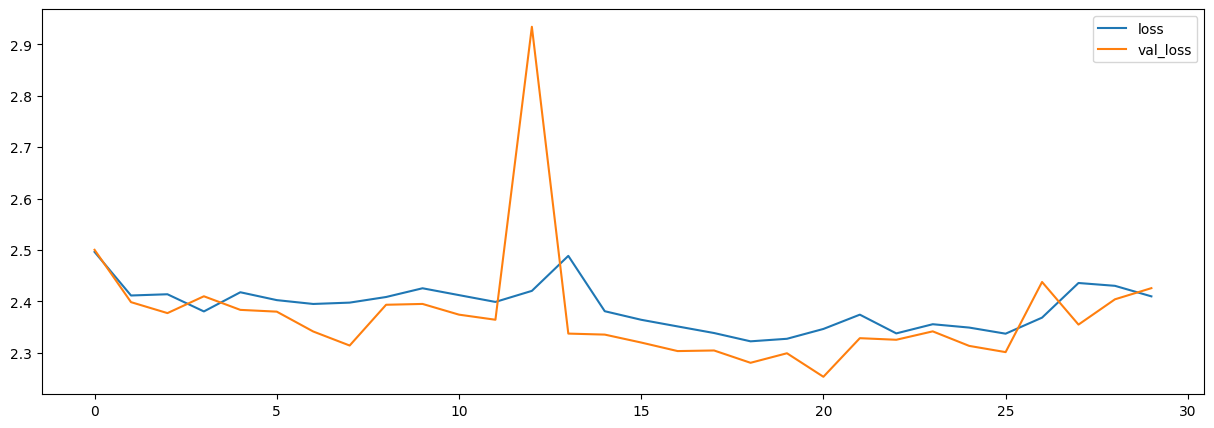

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### LSTM 모델링
- 시퀀스의 길이가 길어질수록 SimpleRNN의 기울기 소실 문제가 크게 발생!
- 초기의 기억에 대한 값이 시간이 지날 수록 흐려진다
- 이를 보완하기 위해 기억의 중요성을 관리하는 연산이 추가됨 -> LSTM 개발
- 중요한 기억은 오래가도록, 불필요한 기억은 삭제되도록 관리

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(120,1)))
model2.add(LSTM(128))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(46, activation = 'softmax'))

In [ ]:
# 학습 평가 방법 설정
model2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
history2 = model2.fit(X_train_pad_reshape, y_train, validation_split = 0.3 , epochs = 30 )

Epoch 1/30
197/197 [==============================] - 40s 191ms/step - loss: 2.5006 - accuracy: 0.3434 - val_loss: 2.5166 - val_accuracy: 0.2215
Epoch 2/30
197/197 [==============================] - 38s 193ms/step - loss: 2.4336 - accuracy: 0.3472 - val_loss: 2.3887 - val_accuracy: 0.3532
Epoch 3/30
197/197 [==============================] - 41s 207ms/step - loss: 2.4015 - accuracy: 0.3547 - val_loss: 2.3941 - val_accuracy: 0.3532
Epoch 4/30
197/197 [==============================] - 41s 208ms/step - loss: 2.4080 - accuracy: 0.3593 - val_loss: 2.3784 - val_accuracy: 0.3532
Epoch 5/30
197/197 [==============================] - 39s 196ms/step - loss: 2.3700 - accuracy: 0.3550 - val_loss: 2.2763 - val_accuracy: 0.3740
Epoch 6/30
197/197 [==============================] - 41s 206ms/step - loss: 2.2569 - accuracy: 0.4021 - val_loss: 2.1949 - val_accuracy: 0.4256
Epoch 7/30
197/197 [==============================] - 37s 186ms/step - loss: 2.2121 - accuracy: 0.4148 - val_loss: 2.1460 - val_ac

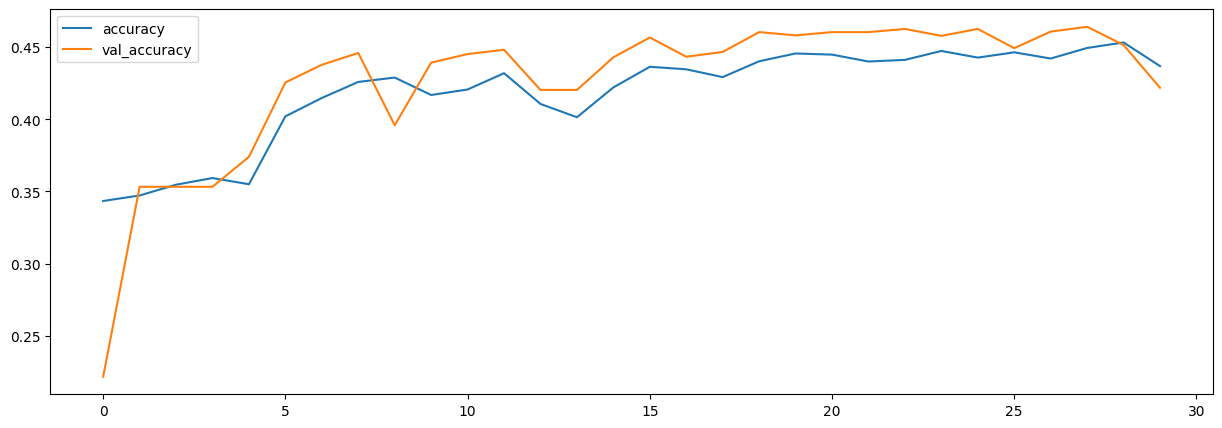

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

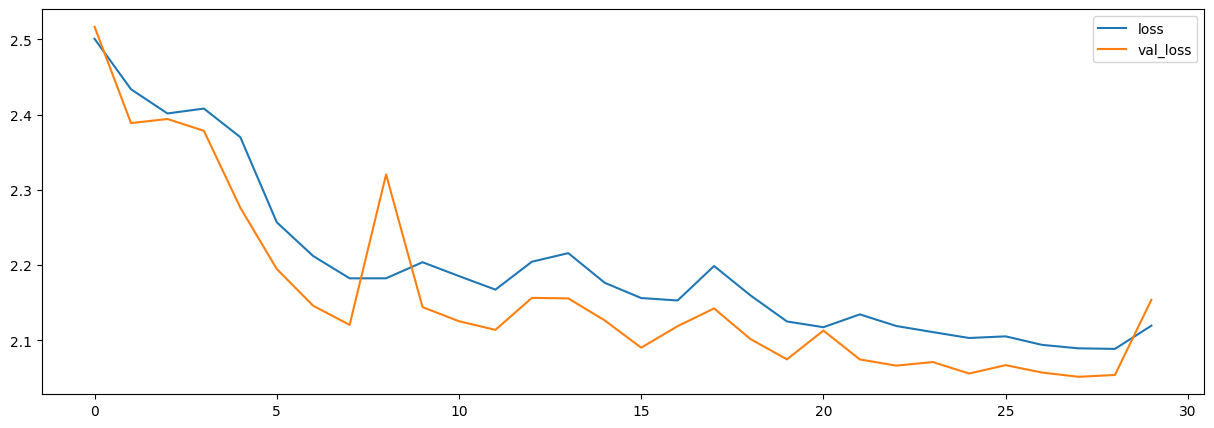

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### 워드 임베딩
- 현재 로이터 뉴스는 빈도수를 기준으로 수치화 되어있는 상태!
- 단어의 본질적 의미를 이해하고 학습시키기 위해, 단순한 단어 구분을 위한 수치화가 아닌 단어의 의미에 따라 세부적으로 만들어진 실수 형태의 표현법 필요!

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
model3 = Sequential()
 # 전체 기사에 등장하는 단어 종류는 총 1000개, 50개의 숫자 패턴(실수 형태)
model3.add(Embedding(1000, 50))  # 사용되는 단어의 수, 각 단어를 표현할 실수의 수
model3.add(InputLayer(input_shape=(120, 1)))
model3.add(LSTM(128))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(128, activation = 'softmax'))

In [ ]:
model3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
history3 = model3.fit(X_train_pad_reshape, y_train, validation_split = 0.3 , epochs = 30 )

Epoch 1/30
197/197 [==============================] - 42s 173ms/step - loss: 2.6883 - accuracy: 0.3440 - val_loss: 2.4107 - val_accuracy: 0.3532
Epoch 2/30
197/197 [==============================] - 17s 86ms/step - loss: 2.3479 - accuracy: 0.3916 - val_loss: 2.0412 - val_accuracy: 0.4879
Epoch 3/30
197/197 [==============================] - 12s 61ms/step - loss: 2.0479 - accuracy: 0.4827 - val_loss: 1.9612 - val_accuracy: 0.4931
Epoch 4/30
197/197 [==============================] - 10s 49ms/step - loss: 1.9073 - accuracy: 0.5056 - val_loss: 1.7980 - val_accuracy: 0.5254
Epoch 5/30
197/197 [==============================] - 6s 32ms/step - loss: 1.7702 - accuracy: 0.5403 - val_loss: 1.6999 - val_accuracy: 0.5521
Epoch 6/30
197/197 [==============================] - 6s 29ms/step - loss: 1.7039 - accuracy: 0.5610 - val_loss: 1.6551 - val_accuracy: 0.5840
Epoch 7/30
197/197 [==============================] - 4s 19ms/step - loss: 1.6486 - accuracy: 0.5777 - val_loss: 1.6141 - val_accuracy: 0

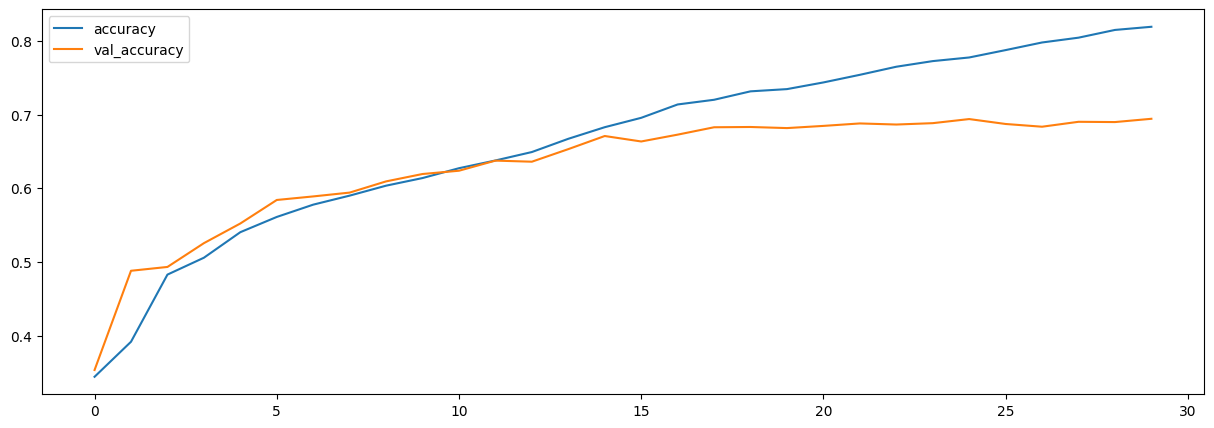

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history3.history['accuracy'], label = 'accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

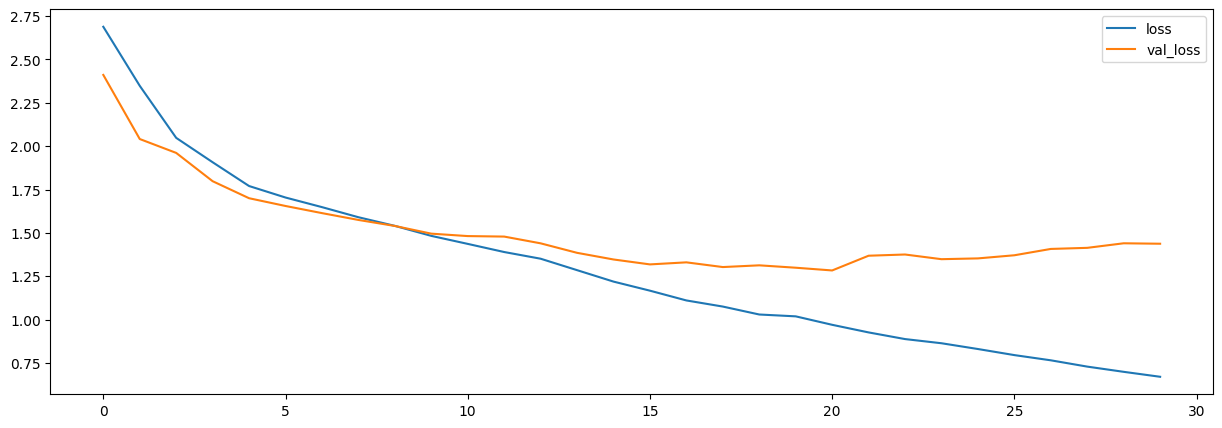

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history3.history['loss'], label = 'loss')
plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### 모델 수정하기
- num_words 숫자 -> Embedding
- 시퀀스 길이도 수정
- LSTM 뉴런의 개수 / LSTM층의 깊이

In [ ]:
# 데이터 전처리
# 각 기사의 단어 수가 다르기 때문에 단어의 갯수(숫자)를 맞춰주자!
X_train_pad = sequence.pad_sequences(X_train, maxlen = 130)
X_test_pad = sequence.pad_sequences(X_test, maxlen = 130)

In [ ]:
X_train_pad_reshape = X_train_pad.reshape(8982,130,1)
X_test_pad_reshape = X_test_pad.reshape(2246, 130, 1)
# sample, time step, feuture

In [ ]:
model4 = Sequential()
 # 전체 기사에 등장하는 단어 종류는 총 1000개, 50개의 숫자 패턴(실수 형태)
model4.add(Embedding(1500, 55))  # 사용되는 단어의 수, 각 단어를 표현할 실수의 수
model4.add(InputLayer(input_shape=(130, 1)))
model4.add(LSTM(128, return_sequences= True))  # 다수 입력 단일 출력 -> 다수 출력에 되게 하기
model4.add(LSTM(128))  # LSTM 특징 : 다수 입력 단일 출력
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(46, activation = 'softmax'))

model4.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
history4 = model4.fit(X_train_pad_reshape, y_train, validation_split = 0.3 , epochs = 30 )

Epoch 1/30
197/197 [==============================] - 41s 187ms/step - loss: 2.6778 - accuracy: 0.3493 - val_loss: 2.4030 - val_accuracy: 0.3532
Epoch 2/30
197/197 [==============================] - 21s 109ms/step - loss: 2.4336 - accuracy: 0.3510 - val_loss: 2.3923 - val_accuracy: 0.3532
Epoch 3/30
197/197 [==============================] - 14s 68ms/step - loss: 2.4339 - accuracy: 0.3423 - val_loss: 2.3889 - val_accuracy: 0.3532
Epoch 4/30
197/197 [==============================] - 9s 48ms/step - loss: 2.4316 - accuracy: 0.3510 - val_loss: 2.3856 - val_accuracy: 0.3532
Epoch 5/30
197/197 [==============================] - 8s 41ms/step - loss: 2.3456 - accuracy: 0.3800 - val_loss: 2.1114 - val_accuracy: 0.4776
Epoch 6/30
197/197 [==============================] - 7s 34ms/step - loss: 1.9416 - accuracy: 0.4893 - val_loss: 1.8286 - val_accuracy: 0.5054
Epoch 7/30
197/197 [==============================] - 5s 26ms/step - loss: 1.7567 - accuracy: 0.5405 - val_loss: 1.7011 - val_accuracy: 0

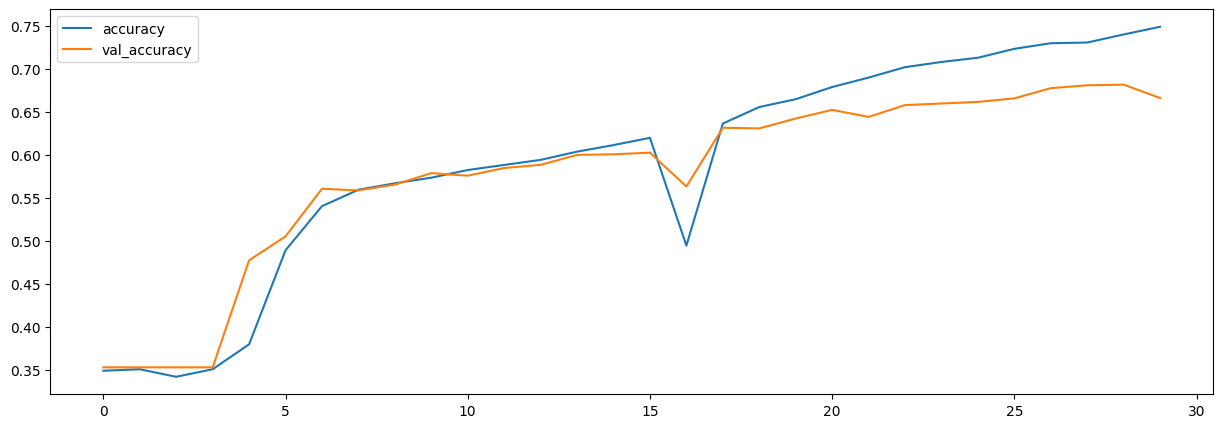

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history4.history['accuracy'], label = 'accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

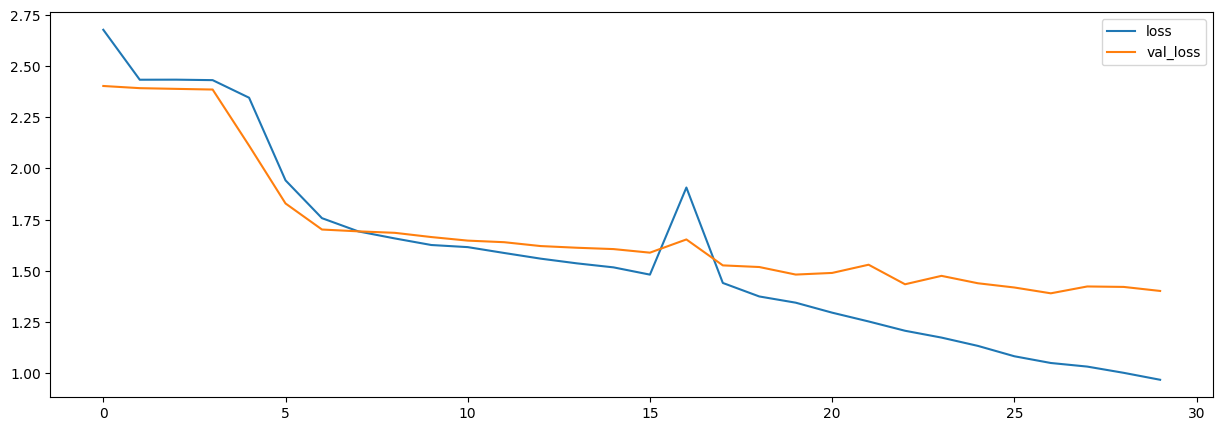

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(history4.history['loss'], label = 'loss')
plt.plot(history4.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()